# Konfigurasi Wenner Alpha

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Done")

Done


In [2]:
df_WenAlpha = pd.read_csv("12112022_105135_SP_WenAlpha_WA Cimenyan.csv")
df_WenAlpha

,Counter,Layer,I1,I2,V1,V2,I1_RealPosition (m),I2_RealPosition (m),V1_RealPosition (m),V2_RealPosition (m),Datum Mid Point (m),IResult (A),VResult (V),RResult;;;;;;;;;;;;;;;;
0,1,1,0,0,2,3,∞,∞,10,20,0,0,0.31500,∞;;;;;;;;;;;;;;;;
1,2,1,0,0,3,4,∞,∞,20,30,0,0,0.04133,∞;;;;;;;;;;;;;;;;
2,3,1,0,0,4,5,∞,∞,30,40,0,0,0.09400,∞;;;;;;;;;;;;;;;;
3,4,1,0,0,5,6,∞,∞,40,50,0,0,0.14100,∞;;;;;;;;;;;;;;;;
4,5,1,0,0,6,7,∞,∞,50,60,0,0,0.01800,∞;;;;;;;;;;;;;;;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,6,0,0,11,17,∞,∞,100,160,0,0,0.00900,∞;;;;;;;;;;;;;;;;
80,81,6,0,0,12,18,∞,∞,110,170,0,0,0.01967,∞;;;;;;;;;;;;;;;;
81,82,7,0,0,8,15,∞,∞,70,140,0,0,0.00100,∞;;;;;;;;;;;;;;;;
82,83,7,0,0,9,16,∞,∞,80,150,0,0,0.03500,∞;;;;;;;;;;;;;;;;


### Menghitung nilai d dengan |"V1_RealPosition (m)"-"V2_RealPosition (m)"|

In [3]:
N = df_WenAlpha.shape[0]
d_list = []
for i in range(N):
    d_i = abs(df_WenAlpha["V1_RealPosition (m)"][i] - df_WenAlpha["V2_RealPosition (m)"][i])
    d_list.append(d_i)

### Membuat kolom "DResult (m)" pada dataframe

In [4]:
df_WenAlpha.insert(
    df_WenAlpha.shape[1],
    "DResult (m)",
    d_list,
    True
)

### Menghitung nilai E dengan "VResult (V)"/"DResult (m)"

In [5]:
N = df_WenAlpha.shape[0]
E_list = []
for i in range(N):
    E_i = (df_WenAlpha["VResult (V)"][i])/(df_WenAlpha["DResult (m)"][i])
    E_list.append(E_i)

### Membuat kolom "EResult (V/m)" pada dataframe

In [6]:
df_WenAlpha.insert(
    df_WenAlpha.shape[1], 
    "EResult (V/m)", 
    E_list, 
    True
)

df_WenAlpha

,Counter,Layer,I1,I2,V1,V2,I1_RealPosition (m),I2_RealPosition (m),V1_RealPosition (m),V2_RealPosition (m),Datum Mid Point (m),IResult (A),VResult (V),RResult;;;;;;;;;;;;;;;;,DResult (m),EResult (V/m)
0,1,1,0,0,2,3,∞,∞,10,20,0,0,0.31500,∞;;;;;;;;;;;;;;;;,10,0.031500
1,2,1,0,0,3,4,∞,∞,20,30,0,0,0.04133,∞;;;;;;;;;;;;;;;;,10,0.004133
2,3,1,0,0,4,5,∞,∞,30,40,0,0,0.09400,∞;;;;;;;;;;;;;;;;,10,0.009400
3,4,1,0,0,5,6,∞,∞,40,50,0,0,0.14100,∞;;;;;;;;;;;;;;;;,10,0.014100
4,5,1,0,0,6,7,∞,∞,50,60,0,0,0.01800,∞;;;;;;;;;;;;;;;;,10,0.001800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,6,0,0,11,17,∞,∞,100,160,0,0,0.00900,∞;;;;;;;;;;;;;;;;,60,0.000150
80,81,6,0,0,12,18,∞,∞,110,170,0,0,0.01967,∞;;;;;;;;;;;;;;;;,60,0.000328
81,82,7,0,0,8,15,∞,∞,70,140,0,0,0.00100,∞;;;;;;;;;;;;;;;;,70,0.000014
82,83,7,0,0,9,16,∞,∞,80,150,0,0,0.03500,∞;;;;;;;;;;;;;;;;,70,0.000500


In [7]:
data_E = df_WenAlpha["EResult (V/m)"]

### Menghitung rata-rata data Medan Listrik ("EResult (V/m)")

In [8]:
mean_E = data_E.mean()
mean_E

0.0019394371598639455

### Menentukan nilai puncak (peak) data Medan Listrik ("EResult (V/m)")

In [9]:
peak_E = data_E.max()
peak_E

0.0315

### Menghitung standar deviasi data Medan Listrik ("EResult (V/m)")

In [10]:
stdev_E = data_E.std()
stdev_E

0.004138060431144007

### Menghitung nilai P25, P50, dan P90 data Medan Listrik ("EResult (V/m)")

In [11]:
# P25
p25_E = np.percentile(data_E, 25)
p25_E

0.00030000000000000003

In [12]:
# P50
p50_E = np.percentile(data_E, 50)
p50_E

0.000645

In [13]:
# P90
p90_E = np.percentile(data_E, 90)
p90_E

0.003935600000000002

### Membuat grafik distribusi Gaussian data Medan Listrik

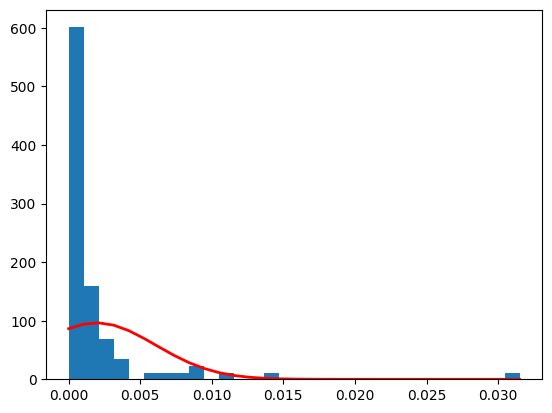

In [14]:
count, bins, ignored = plt.hist(data_E, 30, density=True)
plt.plot(
    bins, 
    (1/(stdev_E * np.sqrt(2*np.pi))) * np.exp( (-((bins - mean_E)**2)) / (2 * (stdev_E**2)) ),
    linewidth=2, 
    color='r'
)
plt.savefig("WenAlpha_gaussian_E.png")
plt.show()

### Menghitung nilai ENoise

In [15]:
N = df_WenAlpha.shape[0]
E_noise_list = []
for i in range(N):
    z = (data_E[i]-mean_E)/(stdev_E)
    E_noise_i = (z)*(stdev_E/(N**0.5))
    E_noise_list.append(E_noise_i)

### Membuat kolom "ENoise" pada dataframe

In [16]:
df_WenAlpha.insert(
    df_WenAlpha.shape[1], 
    "ENoise", 
    E_noise_list, 
    True
)

df_WenAlpha

,Counter,Layer,I1,I2,V1,V2,I1_RealPosition (m),I2_RealPosition (m),V1_RealPosition (m),V2_RealPosition (m),Datum Mid Point (m),IResult (A),VResult (V),RResult;;;;;;;;;;;;;;;;,DResult (m),EResult (V/m),ENoise
0,1,1,0,0,2,3,∞,∞,10,20,0,0,0.31500,∞;;;;;;;;;;;;;;;;,10,0.031500,0.003225
1,2,1,0,0,3,4,∞,∞,20,30,0,0,0.04133,∞;;;;;;;;;;;;;;;;,10,0.004133,0.000239
2,3,1,0,0,4,5,∞,∞,30,40,0,0,0.09400,∞;;;;;;;;;;;;;;;;,10,0.009400,0.000814
3,4,1,0,0,5,6,∞,∞,40,50,0,0,0.14100,∞;;;;;;;;;;;;;;;;,10,0.014100,0.001327
4,5,1,0,0,6,7,∞,∞,50,60,0,0,0.01800,∞;;;;;;;;;;;;;;;;,10,0.001800,-0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,6,0,0,11,17,∞,∞,100,160,0,0,0.00900,∞;;;;;;;;;;;;;;;;,60,0.000150,-0.000195
80,81,6,0,0,12,18,∞,∞,110,170,0,0,0.01967,∞;;;;;;;;;;;;;;;;,60,0.000328,-0.000176
81,82,7,0,0,8,15,∞,∞,70,140,0,0,0.00100,∞;;;;;;;;;;;;;;;;,70,0.000014,-0.000210
82,83,7,0,0,9,16,∞,∞,80,150,0,0,0.03500,∞;;;;;;;;;;;;;;;;,70,0.000500,-0.000157


In [17]:
data_E_noise = df_WenAlpha["ENoise"]

### Menghitung rata-rata data noise ("ENoise")

In [18]:
mean_E_noise = data_E_noise.mean()
mean_E_noise

1.613396090008191e-20

### Menghitung nilai puncak data noise ("ENoise")

In [19]:
peak_E_noise = data_E_noise.max()
peak_E_noise

0.0032253218285814827

### Menghitung nilai standar deviasi data noise ("ENoise")

In [20]:
stdev_E_noise = data_E_noise.std()
stdev_E_noise

0.0004514994084766431

### Menghitung nilai P25, P50, dan P90 data Medan Listrik ("EResult (V/m)")

In [21]:
# P25
p25_E_noise = np.percentile(data_E_noise, 25)
p25_E_noise

-0.00017887725909999878

In [22]:
# P50
p50_E_noise = np.percentile(data_E_noise, 50)
p50_E_noise

-0.0001412346730342901

In [23]:
# P90
p90_E_noise = np.percentile(data_E_noise, 90)
p90_E_noise

0.00021779922177098837